In [13]:
%run -m codex.nb.logging
%matplotlib inline
import matplotlib.pyplot as plt
from codex import data as codex_data

In [2]:
model_path = codex_data.initialize_best_focus_model()
model_path

'/Users/eczech/.codex/cache/best_focus/model/model.ckpt-1000042'

In [3]:
from codex.miq import prediction

2018-04-18 08:29:48,191:WARNING:tensorflow: From /Users/eczech/anaconda3/envs/codex/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:198: retry (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Use the retry module or similar alternatives.


In [19]:
np.stack([np.ones([3, 3, 3]), np.ones([3, 3, 3])], 1).shape

(3, 2, 3, 3)

In [4]:
m = prediction.ImageQualityClassifier(model_path, 84, 11)

2018-04-18 08:29:49,450:INFO:root: Using model_id = 0.
2018-04-18 08:29:49,526:INFO:tensorflow: Restoring parameters from /Users/eczech/.codex/cache/best_focus/model/model.ckpt-1000042
2018-04-18 08:29:49,796:INFO:root: Model restored from /Users/eczech/.codex/cache/best_focus/model/model.ckpt-1000042.


In [7]:
import os
import numpy as np
from skimage import io
from skimage.filters import gaussian
test_dir = os.path.expanduser('~/repos/misc/python/microscopeimagequality/tests/data')
img = io.imread(test_dir + '/BBBC006_z_aligned__a04__s1__w1_10.png')
imgs = [gaussian(img, sig) for sig in np.linspace(0., 10., num=9)]
img = io.concatenate_images(imgs)
img.shape

(9, 520, 696)

In [8]:
def get_score(data):
    pred = m.predict(data)
    return pred

scores = [get_score(img[i]) for i in range(img.shape[0])]

In [10]:
score_pred = [score.predictions for score in scores]
score_pred

[0, 0, 3, 5, 6, 8, 10, 10, 10]

In [14]:
def plot_stack(img, titles=None):
    fig, axs = plt.subplots(3, img.shape[0]//3)
    axs = axs.ravel()
    fig.set_size_inches(12, 8)
    for i in range(img.shape[0]):
        axs[i].imshow(img[i])
        axs[i].axis('off')
        axs[i].set_title(titles[i] if titles else 'Slice {}'.format(i+1))
    plt.tight_layout()

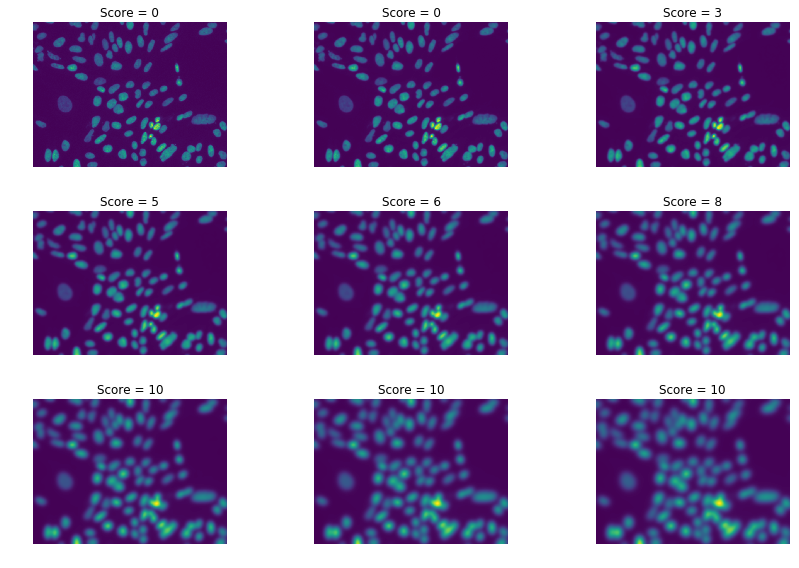

In [15]:
plot_stack(img, ['Score = {}'.format(score) for score in score_pred])